<a href="https://colab.research.google.com/github/amhaiskar0921/AmazonProject/blob/main/PreprocessingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np

##Loading the data

In [ ]:
# Getting random samples of our raw datasets
np.random.seed(42)

sample_size = 100000

shopping_data = pq.read_table('/content/drive/MyDrive/Amazon (LA) - Multi-Class Product Classification (Team A)/Datasets/shopping_queries_dataset_examples.parquet')
df_queries = shopping_data.to_pandas().sample(n=sample_size, random_state=42)

# This line takes up 7GB ram and a couple of seconds to run
shopping_data_p = pq.read_table('/content/drive/MyDrive/Amazon (LA) - Multi-Class Product Classification (Team A)/Datasets/shopping_queries_dataset_products.parquet')
df_products = shopping_data_p.to_pandas().sample(n=sample_size, random_state=42)

EDA results:

- The queries dataset has no null values
- The products dataset has no null product titles

##Creating merged dataset

In [ ]:
df_merged = pd.merge(df_queries, df_products, on=['product_id', 'product_locale'], how='inner')

In [ ]:
# Dropping columns that I don't need
columns_to_keep = ['product_id', 'product_locale', 'product_title', 'product_description', 'product_brand', 'esci_label', 'query']
df_merged = df_merged[columns_to_keep]

In [ ]:
df_merged.head()

,product_id,product_locale,product_title,product_description,product_brand,esci_label,query
0,B00BO9BGYU,es,LIGHT IRRIDIANCE OXIGENADA 20VOL DE 1000ML L.I...,None,Light Irridiance,I,yunsey tinte sin amoniaco
1,3836582864,es,Peter Lindbergh. On Fashion Photography. 40th ...,None,Taschen,I,libro channel de decoracion
2,B085TCJ87R,us,Lenovo ThinkCentre M75s Small Form Factor SFF ...,None,Lenovo,I,ryzen 11
3,B002T3RV5S,us,Delta Faucet Foundations Single-Function Tub a...,None,DELTA FAUCET,I,tub faucet without shower head
4,B082KFTF41,us,"KOKODI LCD Writing Tablet, 10 Inch Colorful To...",<p><b>Features That You Will Love:</b> <br>1. ...,KOKODI,E,educational toys for 3 year old


###Handling missing values by replacing with ""

In [ ]:
missing_values = df_merged.isnull().sum()
print(missing_values)
print("Total products: ", len(df_merged))

product_id                0
product_locale            0
product_title             0
product_description    2779
product_brand           367
esci_label                0
query                     0
dtype: int64
Total products:  5434


In [ ]:
df_merged.fillna("", inplace=True)

In [ ]:
del df_queries
del df_products

###Cleaning the data

Making everything lowercase

In [ ]:
# Assuming 'df' is your DataFrame
columns_to_lower = ['query', 'product_title', 'product_description', 'product_brand']

# Apply lower() to the specified columns
df_merged[columns_to_lower] = df_merged[columns_to_lower].apply(lambda x: x.str.lower())

# Display the first few rows of the DataFrame after applying lower()
print(df_merged.head())

   product_id product_locale  \
0  B00BO9BGYU             es   
1  3836582864             es   
2  B085TCJ87R             us   
3  B002T3RV5S             us   
4  B082KFTF41             us   

                                       product_title  \
0  light irridiance oxigenada 20vol de 1000ml l.i...   
1  peter lindbergh. on fashion photography. 40th ...   
2  lenovo thinkcentre m75s small form factor sff ...   
3  delta faucet foundations single-function tub a...   
4  kokodi lcd writing tablet, 10 inch colorful to...   

                                 product_description     product_brand  \
0                                                     light irridiance   
1                                                              taschen   
2                                                               lenovo   
3                                                         delta faucet   
4  <p><b>features that you will love:</b> <br>1. ...            kokodi   

  esci_label             

Seeing the word cloud: lots of html br and p tags

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

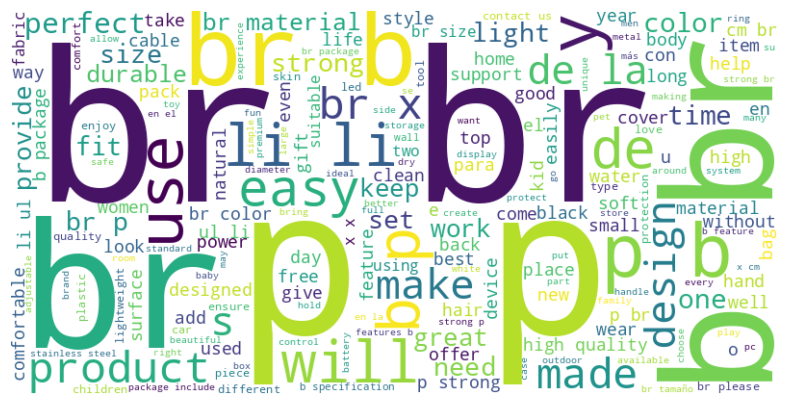

In [ ]:
# Assuming 'df_merged' is your DataFrame and 'text_column' is the column containing text
text_column = 'product_description'  # Adjust this based on your specific column name

# Combine all text into a single string
text_combined = ' '.join(df_merged[text_column])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Removing punctuation and non-alphanumeric chars across all 3 languages

In [ ]:
unique_chars = list(set(''.join(df_merged['product_description'])))
for i in range(0, len(unique_chars), 9):
  print(unique_chars[i : i + 9])

['築', '栃', '飯', '我', '硬', '汁', 'ア', '見', '玄']
['唇', '紐', '複', '燕', 'ん', '关', '품', '譜', '順']
['府', '賠', '온', '馳', '足', '新', '堂', '🚫', '閣']
['紳', '駐', 'り', '菓', '辰', '専', '押', '南', '物']
['象', '損', '昔', '古', '娘', '9', '請', '標', '腫']
['係', '⚡', '排', '慢', '가', 'ベ', '眠', '金', '莉']
['｡', 'ミ', 'ゼ', '講', '%', '咀', '毛', '闘', '트']
['새', 'イ', 'こ', '士', '聖', '漫', '隈', '前', '☀']
['密', '壊', '是', '風', '興', '徐', 'ぽ', '©', '砕']
['べ', '/', '商', '締', '二', 'ü', '巴', '存', '室']
['隔', ' ', '❀', '拡', '信', '骸', '️', '踏', '邪']
['撚', '紺', '러', '棄', 'k', '四', '厨', '奥', '嬢']
['距', '著', '久', '埃', '空', '★', '工', '轟', '妻']
['荷', '子', 'ω', '☞', '羨', '戮', '枯', '由', '横']
['＝', '如', '嫌', '胤', '謀', '胡', '🚀', '②', '販']
['ｍ', '植', '樣', 'q', '宴', '頂', 'ã', '夜', '박']
['進', '売', '好', '祥', '代', '未', '送', '奏', '対']
['此', '画', '◀', '掴', '替', '重', '雰', '🎁', '径']
['幣', '…', '^', '婆', '¦', '加', 'ل', '帰', '緩']
['🗺', '湾', 'ｰ', '柩', '鬼', '離', 'ج', '［', '的']
['ほ', '📷', '燃', '道', 'ｇ', '만', '番', '水', '辿']
['肢', '¯', '爆', '校', 'ぎ', '蝮', '拷'

Filtered data:

Checking the word cloud again:

##Data Preprocessing

###Removing stopwords and HTML tags

In [ ]:
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Function to remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

In [ ]:
# Apply the clean_text function to specified columns
columns_to_clean = ['product_description', 'product_title', 'query', 'product_brand']

for col in columns_to_clean:
    df_merged[col] = df_merged[col].apply(remove_html_tags)

<ipython-input-15-67059adc610b>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


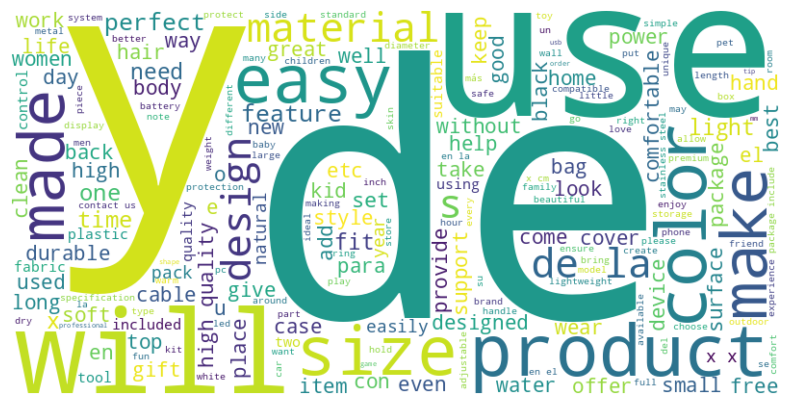

In [ ]:
# Assuming 'df_merged' is your DataFrame and 'text_column' is the column containing text
text_column = 'product_description'  # Adjust this based on your specific column name

# Combine all text into a single string
text_combined = ' '.join(df_merged[text_column])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
unique_chars = list(set(''.join(df_merged['product_description'])))
for i in range(0, len(unique_chars), 9):
  print(unique_chars[i : i + 9])

['築', '栃', '飯', '我', '硬', '汁', 'ア', '見', '玄']
['唇', '紐', '複', '燕', 'ん', '关', '품', '譜', '順']
['府', '賠', '온', '馳', '足', '新', '堂', '🚫', '閣']
['紳', '駐', 'り', '菓', '辰', '専', '押', '南', '物']
['象', '損', '昔', '古', '娘', '9', '請', '標', '腫']
['係', '⚡', '排', '慢', '가', 'ベ', '眠', '金', '莉']
['｡', 'ミ', 'ゼ', '講', '%', '咀', '毛', '闘', '트']
['새', 'イ', 'こ', '士', '聖', '漫', '隈', '前', '☀']
['密', '壊', '是', '風', '興', '徐', 'ぽ', '©', '砕']
['べ', '/', '商', '締', '二', 'ü', '巴', '存', '室']
['隔', ' ', '❀', '拡', '信', '骸', '️', '踏', '邪']
['撚', '紺', '러', '棄', 'k', '四', '厨', '奥', '嬢']
['距', '著', '久', '埃', '空', '★', '工', '轟', '妻']
['荷', '子', 'ω', '☞', '羨', '戮', '枯', '由', '横']
['＝', '如', '嫌', '胤', '謀', '胡', '🚀', '②', '販']
['ｍ', '植', '樣', 'q', '宴', '頂', 'ã', '夜', '박']
['進', '売', '好', '祥', '代', '未', '送', '奏', '対']
['此', '画', '◀', '掴', '替', '重', '雰', '🎁', '径']
['幣', '…', '^', '婆', '¦', '加', 'ل', '帰', '緩']
['🗺', '湾', 'ｰ', '柩', '鬼', '離', 'ج', '［', '的']
['ほ', '📷', '燃', '道', 'ｇ', '만', '番', '水', '辿']
['肢', '¯', '爆', '校', 'ぎ', '蝮', '拷'

In [ ]:
import re

def clean_text(text):
    # Match alphanumeric characters and specified Unicode scripts
    cleaned_text = ' '.join(re.findall(r'\b\w+\b|[\\p{Script=Latin}]|[\\p{Script=Hiragana}]|[\\p{Script=Katakana}]|[\\p{Script=Han}]', text))
    return cleaned_text

In [ ]:
import urllib
from urllib.request import urlopen

def get_japanese_stopwords():
  iso_path = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ja/master/stopwords-ja.txt"
  iso_file = urllib.request.urlopen(iso_path)
  stopwords = [line.decode("utf-8").strip() for line in iso_file]

  stopwords = [ss for ss in stopwords if not ss==u'']
  return stopwords


In [ ]:
stop_words = set(stopwords.words('english') + stopwords.words('spanish') + get_japanese_stopwords())
def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [ ]:
# Apply the HTML and stopword removal functions to specified columns
columns_to_clean = ['product_description', 'product_title', 'query', 'product_brand']

for col in columns_to_clean:
    df_merged[col] = df_merged[col].apply(clean_text)
    df_merged[col] = df_merged[col].apply(remove_stopwords)

In [ ]:
unique_chars = list(set(''.join(df_merged['product_description'])))
for i in range(0, len(unique_chars), 9):
  print(unique_chars[i : i + 9])

['築', '栃', '飯', '我', '硬', '汁', 'ア', '見', '玄']
['唇', '紐', '複', '燕', 'ん', '关', '품', '譜', '順']
['府', '賠', '온', '馳', '足', '新', '堂', '閣', '紳']
['駐', 'り', '菓', '辰', '専', '押', '南', '物', '象']
['損', '昔', '古', '娘', '9', '請', '標', '腫', '係']
['排', '慢', '가', 'ベ', '眠', '金', '莉', 'ミ', 'ゼ']
['講', '咀', '毛', '闘', '트', '새', 'イ', 'こ', '士']
['聖', '漫', '隈', '前', '密', '壊', '是', '風', '興']
['徐', 'ぽ', '砕', 'べ', '二', '商', '締', 'ü', '巴']
['存', '室', '隔', ' ', '拡', '信', '骸', '踏', '邪']
['撚', '紺', '러', '棄', 'k', '四', '厨', '奥', '嬢']
['距', '著', '久', '埃', '空', '工', '轟', '妻', '荷']
['子', 'ω', '羨', '戮', '枯', '由', '横', '如', '嫌']
['胤', '謀', '胡', '②', '販', 'ｍ', '植', '樣', 'q']
['宴', '頂', 'ã', '夜', '박', '進', '売', '好', '祥']
['代', '未', '送', '奏', '対', '此', '画', '掴', '替']
['重', '雰', '径', '幣', '婆', '加', 'ل', '帰', '緩']
['湾', 'ｰ', '柩', '鬼', '離', 'ج', '的', 'ほ', '燃']
['道', 'ｇ', '만', '番', '水', '辿', '肢', '爆', '校']
['ぎ', '蝮', '拷', '要', '頭', '輪', '狂', '償', '珍']
['偏', '培', '協', '廷', 'マ', '態', '面', '北', '丹']
['変', '泡', '綱', '差', 'á', '으', '血'

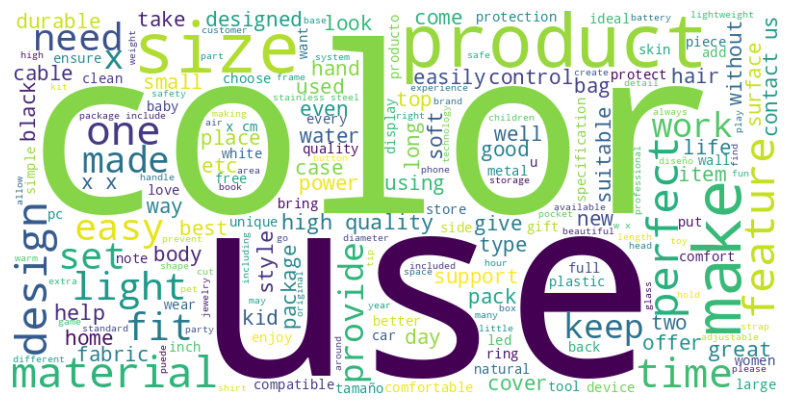

In [ ]:
# Assuming 'df_merged' is your DataFrame and 'text_column' is the column containing text
text_column = 'product_description'  # Adjust this based on your specific column name

# Combine all text into a single string
text_combined = ' '.join(df_merged[text_column])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
print(df_merged.head())

   product_id product_locale  \
0  B00BO9BGYU             es   
1  3836582864             es   
2  B085TCJ87R             us   
3  B002T3RV5S             us   
4  B082KFTF41             us   

                                       product_title  \
0  light irridiance oxigenada 20vol 1000ml l negr...   
1  peter lindbergh fashion photography 40th anniv...   
2  lenovo thinkcentre m75s small form factor sff ...   
3  delta faucet foundations single function tub s...   
4  kokodi lcd writing tablet 10 inch colorful tod...   

                                 product_description     product_brand  \
0                                                     light irridiance   
1                                                              taschen   
2                                                               lenovo   
3                                                         delta faucet   
4  features love 1 10 inch lcd colorful screen of...            kokodi   

  esci_label             

##Stemming, Lemmatizing

In [ ]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')

def stem_and_lemmatize_english(text):
    # Tokenization (if not done already)
    tokens = nltk.word_tokenize(text)

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos=wordnet.VERB) for token in stemmed_tokens]

    return lemmatized_tokens

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import spacy

In [ ]:
!python -m spacy download es_core_news_sm

2023-11-25 05:38:28.927468: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-25 05:38:28.927552: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-25 05:38:28.927612: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-25 05:38:31.001035: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 41.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
from nltk.stem import SnowballStemmer

# Load SpaCy model for Spanish
nlp_es = spacy.load('es_core_news_sm')

def stem_and_lemmatize_spanish(text):
    # Stemming with SnowballStemmer
    stemmer = SnowballStemmer('spanish')
    tokens = nltk.word_tokenize(text)
    for token in tokens:
      stemmer.stem(token)

    # Lemmatization using SpaCy
    doc = nlp_es(text)
    lemmatized_tokens = [token.lemma_ for token in doc]

    return lemmatized_tokens

In [ ]:
!pip install mecab-python3

In [ ]:
pip install unidic-lite

In [ ]:
import MeCab

# Install MeCab and its Python wrapper mecab-python3
# pip install mecab-python3

def stem_and_lemmatize_japanese(text):
    # Lemmatization using MeCab
    mecab = MeCab.Tagger("-Owakati")
    lemmatized_tokens = mecab.parse(text).split()

    return lemmatized_tokens


In [ ]:
# Create a new column for BERT input
df_merged['bert_input'] = ""

# Apply functions based on the language specified in the product_locale column
for index, row in df_merged.iterrows():
    locale = row['product_locale']
    query_text = row['query']
    title_text = row['product_title']
    description_text = row['product_description']
    brand_text = row['product_brand']

    if locale == 'us':
        stemmed_lemmatized_query = ' '.join(stem_and_lemmatize_english(query_text))
        stemmed_lemmatized_title = ' '.join(stem_and_lemmatize_english(title_text))
        stemmed_lemmatized_description = ' '.join(stem_and_lemmatize_english(description_text))
        stemmed_lemmatized_brand = ' '.join(stem_and_lemmatize_english(brand_text))
    elif locale == 'es':
        stemmed_lemmatized_query = ' '.join(stem_and_lemmatize_spanish(query_text))
        stemmed_lemmatized_title = ' '.join(stem_and_lemmatize_spanish(title_text))
        stemmed_lemmatized_description = ' '.join(stem_and_lemmatize_spanish(description_text))
        stemmed_lemmatized_brand = ' '.join(stem_and_lemmatize_spanish(brand_text))
    elif locale == 'jp':
        stemmed_lemmatized_query = ' '.join(stem_and_lemmatize_japanese(query_text))
        stemmed_lemmatized_title = ' '.join(stem_and_lemmatize_japanese(title_text))
        stemmed_lemmatized_description = ' '.join(stem_and_lemmatize_japanese(description_text))
        stemmed_lemmatized_brand = ' '.join(stem_and_lemmatize_japanese(brand_text))

    bert_input = f'[CLS] {stemmed_lemmatized_query} [SEP] {stemmed_lemmatized_title} [SEP] {stemmed_lemmatized_description} [SEP] {stemmed_lemmatized_brand} [SEP]'
    df_merged.at[index, 'bert_input'] = bert_input

In [ ]:
df_merged.head()

,product_id,product_locale,product_title,product_description,product_brand,esci_label,query,bert_input
0,B00BO9BGYU,es,light irridiance oxigenada 20vol 1000ml l negr...,,light irridiance,I,yunsey tinte amoniaco,[CLS] yunsey tinte amoniaco [SEP] light irridi...
1,3836582864,es,peter lindbergh fashion photography 40th anniv...,,taschen,I,libro channel decoracion,[CLS] libro channel decoracion [SEP] peter lin...
2,B085TCJ87R,us,lenovo thinkcentre m75s small form factor sff ...,,lenovo,I,ryzen 11,[CLS] ryzen 11 [SEP] lenovo thinkcentr m75 sma...
3,B002T3RV5S,us,delta faucet foundations single function tub s...,,delta faucet,I,tub faucet without shower head,[CLS] tub faucet without shower head [SEP] del...
4,B082KFTF41,us,kokodi lcd writing tablet 10 inch colorful tod...,features love 1 10 inch lcd colorful screen of...,kokodi,E,educational toys 3 year old,[CLS] educ toy 3 year old [SEP] kokodi lcd wri...


In [ ]:
df_merged.to_csv('/content/drive/MyDrive/Amazon (LA) - Multi-Class Product Classification (Team A)/Datasets/preprocessed_merged_data.csv', index=False)

##Tokenizing

In [ ]:
pip install transformers

In [ ]:
from transformers import BertTokenizer

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenize the 'bert_input' column
df_merged['bert_tokens'] = df_merged['bert_input'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, padding="max_length", truncation=True, return_tensors='tf'))


In [ ]:
df_merged.head(20)

,product_id,product_locale,product_title,product_description,product_brand,esci_label,query,bert_input,bert_tokens
0,B00BO9BGYU,es,light irridiance oxigenada 20vol 1000ml l negr...,,light irridiance,I,yunsey tinte amoniaco,[CLS] yunsey tinte amoniaco [SEP] light irridi...,"((tf.Tensor(101, shape=(), dtype=int32), tf.Te..."
1,3836582864,es,peter lindbergh fashion photography 40th anniv...,,taschen,I,libro channel decoracion,[CLS] libro channel decoracion [SEP] peter lin...,"((tf.Tensor(101, shape=(), dtype=int32), tf.Te..."
2,B085TCJ87R,us,lenovo thinkcentre m75s small form factor sff ...,,lenovo,I,ryzen 11,[CLS] ryzen 11 [SEP] lenovo thinkcentr m75 sma...,"((tf.Tensor(101, shape=(), dtype=int32), tf.Te..."
3,B002T3RV5S,us,delta faucet foundations single function tub s...,,delta faucet,I,tub faucet without shower head,[CLS] tub faucet without shower head [SEP] del...,"((tf.Tensor(101, shape=(), dtype=int32), tf.Te..."
4,B082KFTF41,us,kokodi lcd writing tablet 10 inch colorful tod...,features love 1 10 inch lcd colorful screen of...,kokodi,E,educational toys 3 year old,[CLS] educ toy 3 year old [SEP] kokodi lcd wri...,"((tf.Tensor(101, shape=(), dtype=int32), tf.Te..."
5,B01N0DZF25,jp,小学館の図鑑neo 新版 動物,ご注意 お使いの端末によっては 一部読みづらい場合がございます お手持ちの端末で立ち読みファ...,,I,学校に行きたくない君へ,[CLS] 学校 に 行き たく ない 君 へ [SEP] 小学 館 の 図鑑 neo 新版...,"((tf.Tensor(101, shape=(), dtype=int32), tf.Te..."
6,B01N0DZF25,jp,小学館の図鑑neo 新版 動物,ご注意 お使いの端末によっては 一部読みづらい場合がございます お手持ちの端末で立ち読みファ...,,I,子なし のリアル,[CLS] 子 なし の リアル [SEP] 小学 館 の 図鑑 neo 新版 動物 [SE...,"((tf.Tensor(101, shape=(), dtype=int32), tf.Te..."
7,B084GXV474,us,tracfone carrier locked samsung galaxy j7 crow...,,tracfone,E,android phone,[CLS] android phone [SEP] tracfon carrier lock...,"((tf.Tensor(101, shape=(), dtype=int32), tf.Te..."
8,B084GXV474,us,tracfone carrier locked samsung galaxy j7 crow...,,tracfone,E,used phones,[CLS] use phone [SEP] tracfon carrier lock sam...,"((tf.Tensor(101, shape=(), dtype=int32), tf.Te..."
9,B08467FBSR,us,hind 4pk active workout athletic shorts girls ...,hind 4 pack athletic shorts girls perfect pack...,hind,S,soccer shorts girls,[CLS] soccer short girl [SEP] hind 4pk activ w...,"((tf.Tensor(101, shape=(), dtype=int32), tf.Te..."


In [ ]:
print(df_merged['bert_tokens'][0])

tf.Tensor(
[[  101   101 94836 78919 21629 10216 20142 11335 10812   102 15765 10478
  33597 84667   183 20572 11280 11272 10197 34381 12186 63308   180 31481
  12186 63308   122 10161   102   102 15765 10478 33597 84667   102   102
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0  